## The Seventh Lab-assignment (08/05/2022 11:59'AM' - 08/09/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand how to conduct Sampling and Distributions. The data used in this lab assignment will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com). The dataset of this assignment can be downloaded from github: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab-assignment-7

First, set up the tests and imports by running the cell below.

In [1]:
# Install the required package
!pip install datascience

  Created wheel for datascience: filename=datascience-0.17.5-py3-none-any.whl size=732546 sha256=77843b35f692289172fec93809df36374585ad0733e63e9ac040e04a22ce4f67
  Stored in directory: c:\users\bharath\appdata\local\pip\cache\wheels\74\0a\88\e52ce8c2533663326372f4be6eba170267fb70dc6252234186
Successfully built datascience


In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Run the cell below to load player and salary data that we will use for our sampling.

In [4]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the histograms function below, which takes a table with columns Age and Salary and draws a histogram for each one. It uses bin widths of 1 year for Age and $1,000,000 for Salary.

Two histograms should be displayed below


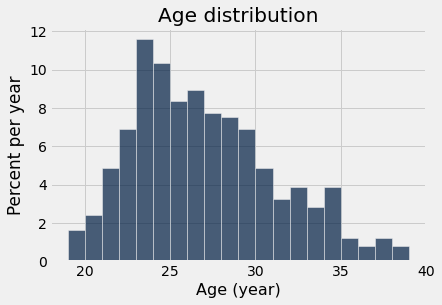

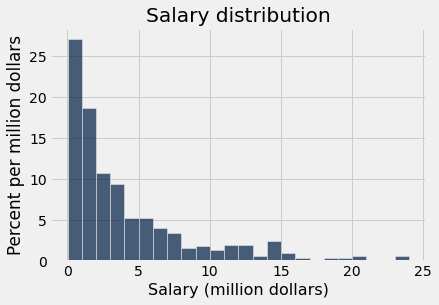

In [5]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

### Question 1 (10 points) 

Create a function called compute_statistics that takes a table containing ages and salaries and:

(1) Draws a histogram of ages

(2) Draws a histogram of salaries

(3) Returns a two-element array containing the average age and average salary (in that order)


You can call the histograms function to draw the histograms!

Note: More charts will be displayed when running the test cell. Please feel free to ignore the charts.

array([  2.65365854e+01,   4.26977577e+06])

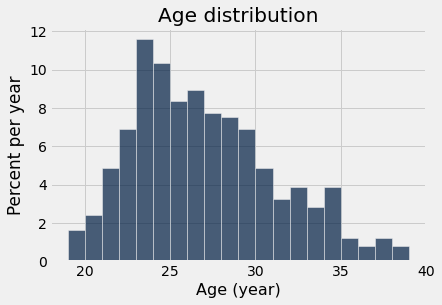

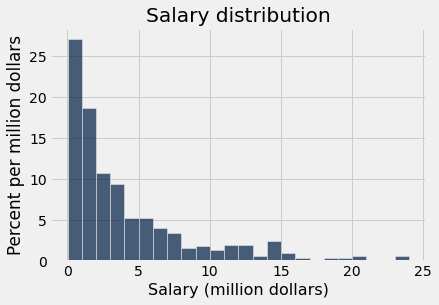

In [22]:
### You code here

def compute_statistics(age_and_salary_data):

    age =age_and_salary_data.column('Age')
    salary = age_and_salary_data.column('Salary')
    histograms(age_and_salary_data)
    age_and_salary_data = make_array(age.mean(),salary.mean())
    
    return age_and_salary_data
    #print('Avg salary :',age_and_salary_data[1])
    

full_stats = compute_statistics(full_data)
full_stats



In [24]:
print('Avg Age:',full_stats[0])
print('Avg Salary:',full_stats[1])

Avg Age: 26.5365853659
Avg Salary: 4269775.76626


In [8]:
full_data.column('Age')

array([28, 30, 19, 23, 28, 30, 24, 32, 23, 23, 21, 26, 26, 22, 27, 32, 27,
       32, 23, 21, 31, 38, 23, 29, 33, 30, 25, 19, 21, 21, 29, 29, 20, 27,
       28, 29, 26, 22, 24, 31, 21, 32, 29, 22, 25, 25, 32, 21, 27, 29, 23,
       25, 23, 29, 35, 29, 26, 19, 22, 23, 27, 30, 24, 24, 31, 33, 30, 34,
       30, 26, 31, 30, 26, 36, 30, 30, 28, 24, 32, 29, 31, 23, 20, 22, 26,
       28, 24, 23, 29, 27, 34, 24, 28, 26, 31, 27, 27, 19, 24, 24, 26, 27,
       31, 23, 24, 34, 26, 25, 25, 24, 28, 21, 30, 23, 26, 23, 31, 22, 25,
       23, 36, 27, 24, 29, 23, 24, 33, 24, 25, 29, 23, 33, 25, 33, 27, 25,
       27, 20, 27, 25, 35, 22, 25, 26, 23, 23, 27, 22, 26, 25, 33, 23, 26,
       28, 20, 30, 28, 29, 27, 32, 20, 29, 24, 21, 28, 24, 25, 21, 24, 24,
       29, 28, 22, 25, 35, 24, 27, 23, 23, 28, 24, 23, 25, 26, 30, 26, 30,
       29, 21, 24, 27, 22, 19, 23, 24, 23, 34, 32, 24, 25, 27, 34, 22, 19,
       35, 23, 29, 22, 21, 31, 31, 34, 28, 37, 28, 28, 27, 28, 26, 24, 25,
       20, 27, 27, 22, 26

In [25]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[0]), 2) == 26.54



True

In [26]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[1]), 2) == 4269775.77



True

### Question 2 (10 points) Convenience sampling

One sampling methodology, which is generally a bad idea, is to choose players who are somehow convenient to sample. For example, you might choose players from one team who are near your house, since it's easier to survey them. This is called, somewhat pejoratively, convenience sampling.

Suppose you survey only relatively new players with ages less than 22. (The more experienced players didn't bother to answer your surveys about their salaries.)

Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [33]:
full_data

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4


In [38]:
### You code here:

#convenience_sample = full_data['age'] < 22
convenience_sample = full_data.where('Age',are.below(22))
convenience_sample


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [39]:
# TEST
convenience_sample.num_columns == 11



True

In [40]:
# TEST
convenience_sample.num_rows == 44



True

### Question 3 (10 points) 

Assign convenience_stats to an array of the average age and average salary of your convenience sample, using the compute_statistics function. Since they're computed on a sample, these are called sample averages.

array([  2.03636364e+01,   2.38353382e+06])

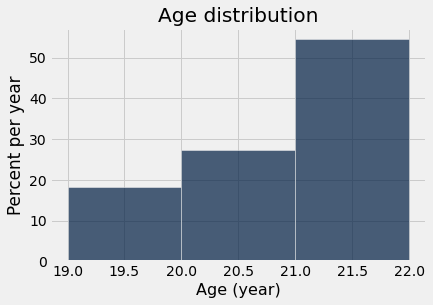

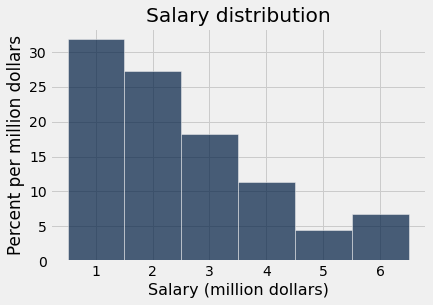

In [41]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats



In [42]:
# TEST
len(convenience_stats) == 2



True

In [43]:
# TEST 
round(float(convenience_stats[0]), 2) == 20.36



True

In [44]:
# TEST
round(float(convenience_stats[1]), 2) == 2383533.82



True

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the bin_column option of the hist method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; just run it.

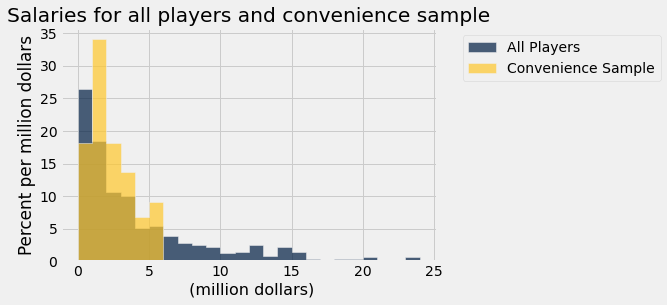

In [45]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

### Question 4 (10 points) 
Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general? Before you move on, write a short answer in English below. You can refer to the statistics calculated above or perform your own analysis.

In [ ]:
### Please write your answer here (no code required)

"""
Answer: 
On observing above plot, The Convinence sample does not matched excatly to all players. This is beacause the convenience sample is 
built based on sample of playes whos age is less than 22. Anyhow the shape is matched for some extent but with large variation in values.

"""

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [46]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Lucas Nogueira,1762680
Greg Smith,948163
Nate Robinson,2106720
Brendan Haywood,2213688
Kris Humphries,4300000


The optional argument with_replacement=False can be passed through sample() to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to sample() with a sample size of 5, without replacement.

In [47]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Elfrid Payton,2397840
Malcolm Lee,915243
Ish Smith,981084
Jason Smith,3278000
Danny Green,4025000


### Question 5 (10 points) 
Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

avg age 26.3863636364
avg sal 2994502.02273


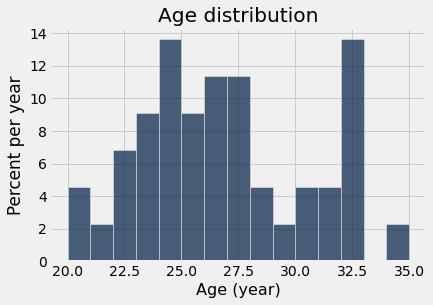

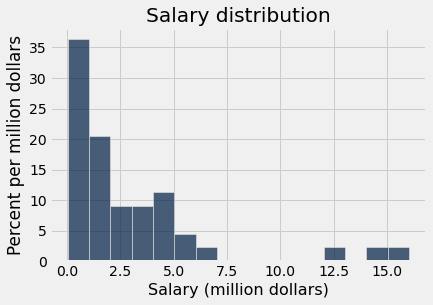

In [68]:
my_small_srswor_data = full_data.sample(44)
my_small_stats = histograms(my_small_srswor_data)
my_small_stats

print('avg age',my_small_srswor_data.column('Age').mean())
print('avg sal',my_small_srswor_data.column('Salary').mean())

avg age 26.3863636364
avg sal 4933173.36364


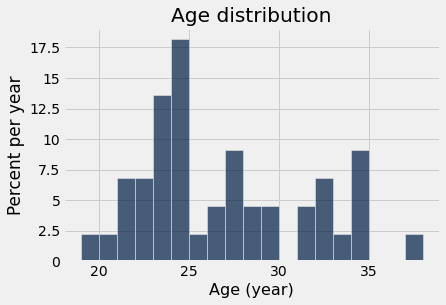

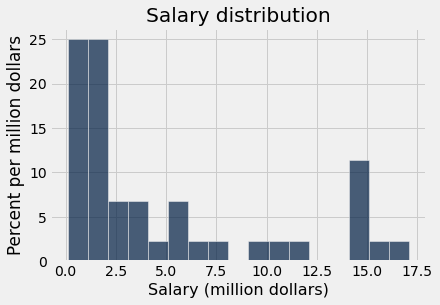

In [69]:
my_small_srswor_data = full_data.sample(44)
my_small_stats = histograms(my_small_srswor_data)
my_small_stats
print('avg age',my_small_srswor_data.column('Age').mean())
print('avg sal',my_small_srswor_data.column('Salary').mean())

avg age 26.3409090909
avg sal 3472557.77273


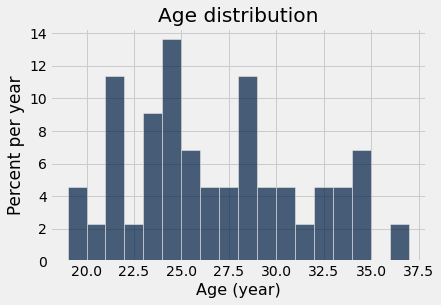

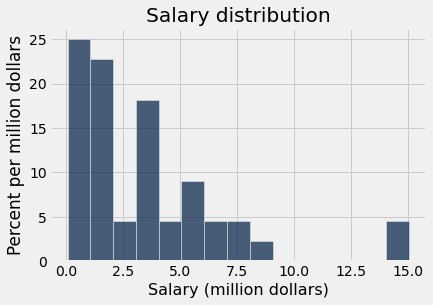

In [70]:
my_small_srswor_data = full_data.sample(44)
my_small_stats = histograms(my_small_srswor_data)
my_small_stats
print('avg age',my_small_srswor_data.column('Age').mean())
print('avg sal',my_small_srswor_data.column('Salary').mean())

Before you move on, write a short answer for the following questions in English:

(1) How much does the average age change across samples?

(2) What about average salary?

In [71]:
### Please write your answer here (no code required)

"""
Answer: 
1) On observing the plots, The plots are changinf for different samples but the average is almost same. The reason is normal
distribution of age.

2) Incase of Salary, The plots change on each different set samples. Also there is a higher change in average for different runs
compared to age.


"""

'\nAnswer: \n1) On observing the plots, The plots are changinf for different samples but the average is almost same. The reason is normal\ndistribution of age.\n2)\n\n\n'

### Question 6 (15 points) - Optional/ Additional extra credit if you loose marks on above questions
As in the previous question, analyze several simple random samples of size 100 from `full_data`.  

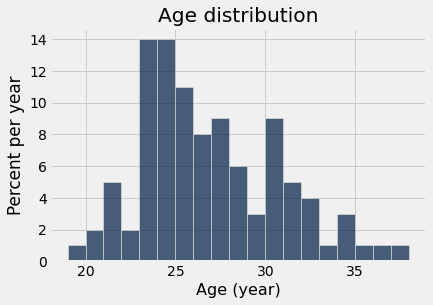

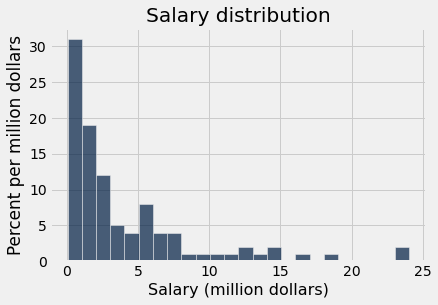

In [72]:
my_large_srswor_data = full_data.sample(100)
my_large_stats =histograms(my_large_srswor_data)
my_large_stats

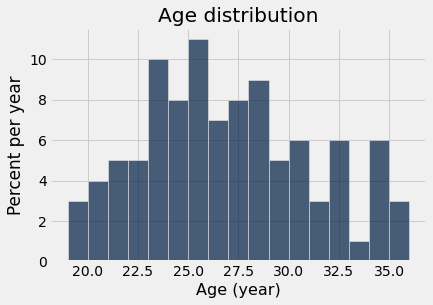

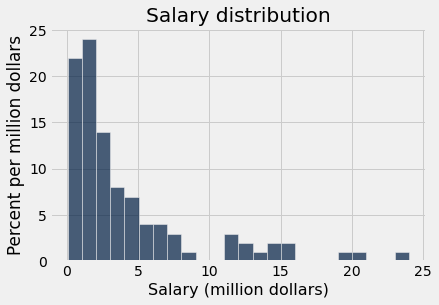

In [73]:
my_large_srswor_data = full_data.sample(100)
my_large_stats =histograms(my_large_srswor_data)
my_large_stats

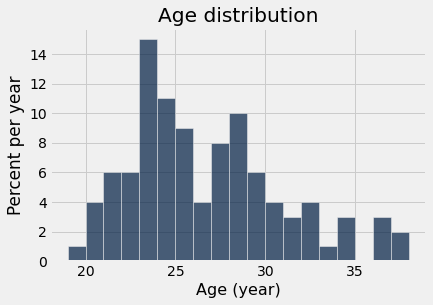

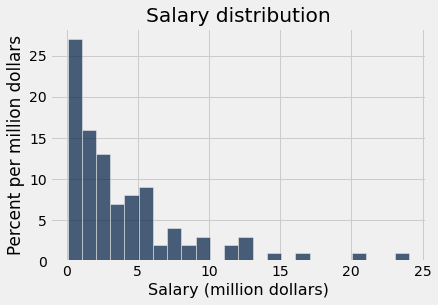

In [74]:
my_large_srswor_data = full_data.sample(100)
my_large_stats =histograms(my_large_srswor_data)
my_large_stats

Answer the following questions in English:

(1) Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?

(2) Are the sample averages and histograms closer to their true values/shape for age or for salary? What did you expect to see?

In [76]:
### Please write your answer here (no code required)

"""
Answer: 

1) There is no much change in shapes of sample size 44 and sample size 100. Both looks normally distributed.

2) There is no much closeness between averages and values. However, The average of age is better closer compared to salary because of 
normality in age distribution.

"""

'\nAnswer: \n\n1) There is no much change in shapes of sample size 44 and sample size 100. Both looks normally distributed.\n\n2) There is no much closeness between averages and values. However, The average of age is better closer compared to salary because of \nnormality in age distribution.\n\n'